#Exe. 1 Import the mnist dataset from the keras.datasets
and load it in x train, y train, x test, y test variables. 

In [ ]:
from tensorflow import keras
data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

**Check the train and test shapes.**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

**In order to be able using the sigmoid activation function, normalize x train and x test according to the maximum and minimum elements of image set, for instance check x train[0].**

In [ ]:
import numpy as np
x_train = np.float32(x_train) / 255.0
x_test = np.float32(x_test)/255.0
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#Exe. 2 Plot some images to see your normalization results.

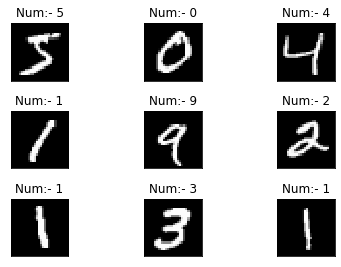

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Num:- {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

#Exe. 3 Let’s define the LATENT SIZE = 32. Create an encoder model consists of a series of Dense layers, each layer is followed by a Dropout and a ReLU layer.

In [ ]:
LATENT_SIZE=32

encoder= keras.Sequential([
keras.layers.Flatten(input_shape=(28,28 )),

keras.layers.Dense(512, activation = "relu"),
keras.layers.Dropout(0.25),

keras.layers.Dense(256, activation = "relu"),
keras.layers.Dropout(0.25),

keras.layers.Dense(128, activation = "relu"),
keras.layers.Dropout(0.25),

keras.layers.Dense(64, activation = "relu"),
keras.layers.Dropout(0.25),

keras.layers.Dense(LATENT_SIZE)
])
encoder.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_51 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_52 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_53 (Dropout)         (None, 128)             

#Exe. 4 Create a decoder model namely decoder. The decoder is essentially the same as the encoder but in reverse.

In [ ]:
decoder = keras.Sequential([
    keras.layers.Dense(64, input_shape=(32,), activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(784, activation='sigmoid'),
    keras.layers.Reshape((28,28), input_shape=(784,))
])
decoder.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_55 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_56 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_57 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 512)             

#Exe. 5 implement the following code in your project:

In [ ]:
from tensorflow . keras . layers import Input
from keras import Model
img = Input ( shape = (28 , 28) )
latent_vector = encoder (img)
output = decoder (latent_vector)
model = Model( inputs = img , outputs = output )
model.compile ("nadam", loss = "binary_crossentropy")

#Exe. 6 The model can be trained as:

In [ ]:
EPOCHS = 60
for epoch in range ( EPOCHS ):
  model . fit ( x_train , x_train )


1875/1875 [==============================] - 8s 4ms/step - loss: 0.1691


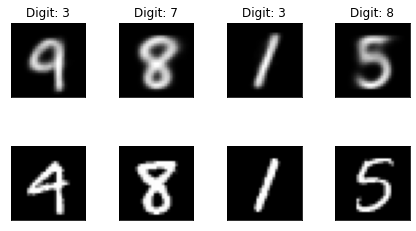

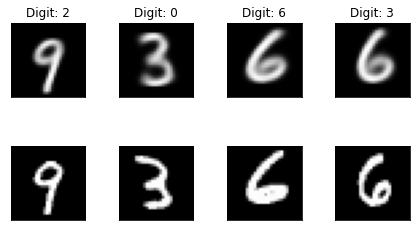

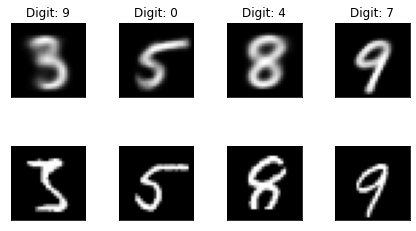

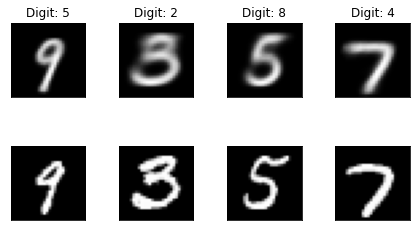

In [ ]:
rand = x_test[ np . random . randint (0 , 10000 , 16) ]. reshape ((4 , 4, 1,28 , 28) )
rand_y = y_test[np.random.randint(0, 10000, 16)].reshape((4,4))
for i in range(len(rand)):
  plt.figure()
  for j in range(len(rand[0])):
    plt.subplot(2,4,j+1)
    plt.tight_layout()
    prediction = model.predict(rand[i, j])[0]
    plt.imshow(prediction, cmap="gray")
    plt.title("Digit: {}".format(rand_y[i,j]))
    plt.xticks([])
    plt.yticks([])
    plt.subplot(2,4,j+5)
    plt.tight_layout()
    plt.imshow(rand[i,j][0], cmap="gray")
    #plt.title("Digit: {}".format(rand_y[i,j]))
    plt.xticks([])
    plt.yticks([])

#Exe. 7 Generate corrupted MNIST images by adding noise with normal distribution (mean = 0.5 and std= 0.5) to your x train and x test dataset. Fix the random seed with your student number.

In [ ]:
import random
random.seed(713918)

x_train_noisy = x_train + np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_test_noisy = x_test + np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_train_noisy.shape,x_test_noisy.shape

((60000, 28, 28), (10000, 28, 28))

#Exe. 8 After adding the random generated noises to the x sets, keep only those among 0 and 1 using np.clip()/

In [ ]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Exe. 9 Print some of your noisy images to see how they are noisy now.

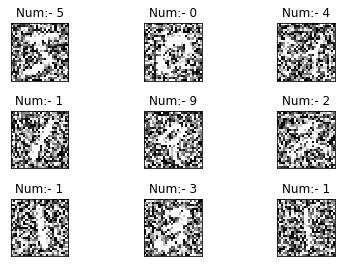

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train_noisy[i], cmap='gray', interpolation='none')
  plt.title("Num:- {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


#Exe. 10 Check the new noisy data with the previous model. How are the results? How they are close to the real images?


EPOCH= 0


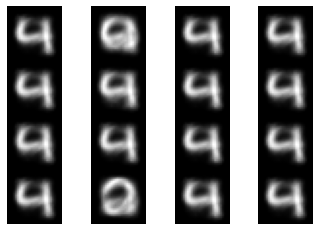

1875/1875 [==============================] - 9s 5ms/step - loss: 0.7704
EPOCH= 1


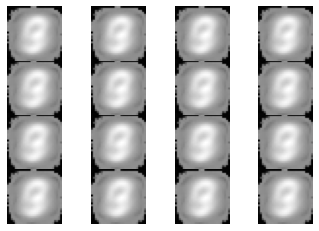

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6819
EPOCH= 2


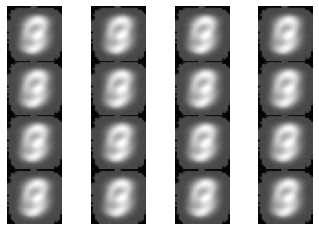

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6707
EPOCH= 3


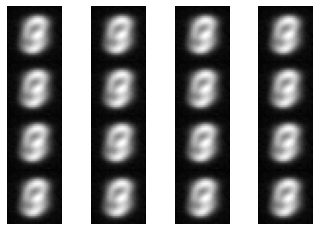

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6704
EPOCH= 4


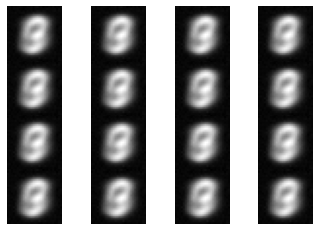

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6704
EPOCH= 5


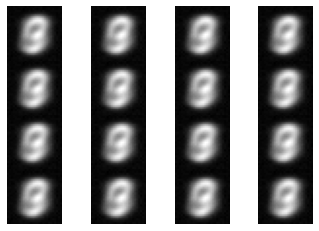

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6704
EPOCH= 6


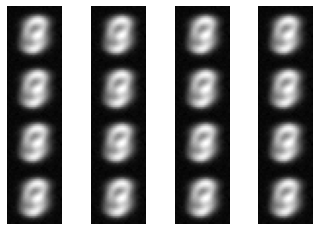

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6704
EPOCH= 7


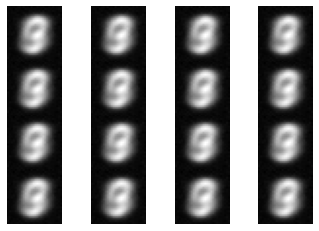

1875/1875 [==============================] - 10s 5ms/step - loss: 0.6704
EPOCH= 8


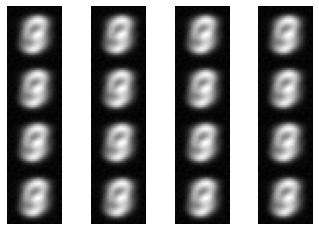

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6704
EPOCH= 9


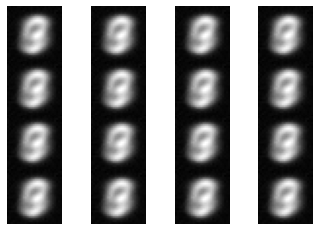

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6704


array([2, 2, 6, 2, 3, 9, 5, 6, 2, 4, 4, 8, 1, 0, 0, 4], dtype=uint8)

In [ ]:
rand = x_test_noisy[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

EPOCHS=10
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    print( "EPOCH=", epoch)
    plt.show()
    model.fit(x_train_noisy, x_train_noisy)
y_test[np.random.randint(0, 10000, 16)]


#Exe. 11 This time design the encoder using Conv2D networks. The model is as following:

In [ ]:
# Reshaping the inputs for conv2D
image_size = x_train.shape [1]
x_train = np . reshape ( x_train , [ -1 , image_size , image_size , 1])
x_test = np . reshape ( x_test , [ -1 , x_test.shape[1] , x_test.shape[1] , 1])
x_test_noisy = np . reshape ( x_test_noisy , [ -1 , x_test_noisy.shape[1] , x_test_noisy.shape[1] , 1])
x_train_noisy = np . reshape ( x_train_noisy , [ -1 , x_train_noisy.shape[1] , x_train_noisy.shape[1] , 1])


In [ ]:

input = keras.Input(shape=(28, 28, 1))

# input should be modified by you
output = keras.layers.Conv2D( filters = 32 ,kernel_size = 3,strides =2 ,activation ='relu',padding ='same')( input )
output = keras.layers.Conv2D( filters = 64 ,kernel_size = 3,strides =2 ,activation ='relu',padding ='same')( output )
output = keras.layers.Flatten()( output )
output = keras.layers.Dense(16)( output )



In [ ]:
encoder2 = keras.Model(input, output)
encoder2.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_81 (Dense)             (None, 16)                50192     
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________


#Exe. 12 Build decoder model, based on the following model

In [ ]:
from keras . layers import Conv2DTranspose
decoder2=models.Sequential()

decoder2.add(layers.Dense(7 * 7 * 64, activation = "relu",input_shape=(16, )))
decoder2.add(layers.Reshape((7, 7, 64)))

decoder2.add(Conv2DTranspose(64 , kernel_size =3, activation='relu', strides=2,padding='same' ) )
decoder2.add(Conv2DTranspose(32 , kernel_size =3, activation='relu', strides=2,padding='same' ) )
decoder2.add(Conv2DTranspose(1 , kernel_size =3, activation='sigmoid',padding='same' ) )
decoder2.add(layers.Reshape((28,28)))

In [ ]:
decoder2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 3136)              53312     
_________________________________________________________________
reshape_10 (Reshape)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
_________________________________________________________________
reshape_11 (Reshape)         (None, 28, 28)            0         
Total params: 108,993
Trainable params: 108,993
Non-trainable params: 0
_______________________________________________

#Exe. 13 Make the final model including the encoder and decoder models, such as:-


In [ ]:
from tensorflow . keras . models import Model
autoencoder = Model (inputs=input , outputs=decoder2(encoder2(input) ) , name ='autoencoder')
autoencoder . summary ()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
model_9 (Functional)         (None, 16)                69008     
_________________________________________________________________
sequential_14 (Sequential)   (None, 28, 28)            108993    
Total params: 178,001
Trainable params: 178,001
Non-trainable params: 0
_________________________________________________________________


#Exe. 14 Compile the model using two classical ’mse’ loss function and ’adam’ optimiser.

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

#Exe. 15 Now train the autoencoder. Notice that the to be trained data here is x train noisy, while the exact data is x train. It is the same for the test data set:

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                validation_data=(x_test_noisy,x_test),
                epochs=30,
                batch_size=128
              )


Epoch 1/30
469/469 [==============================] - 34s 10ms/step - loss: 0.0814 - val_loss: 0.0314
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0285 - val_loss: 0.0222
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0219 - val_loss: 0.0198
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0196 - val_loss: 0.0186
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0183 - val_loss: 0.0179
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0176 - val_loss: 0.0173
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0170 - val_loss: 0.0170
Epoch 8/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0166 - val_loss: 0.0171
Epoch 9/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0162 - val_loss: 0.0165
Epoch 10/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0160 - val_loss: 0.01

In [ ]:
"""from keras.callbacks import TensorBoard
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

"""



#Exe. 16 predict the x test noisy using the trained autoencoder model.

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)


#Exe. 17 Get some of the x test, x test noisy and predicted x test noisy
from the trained model and show compare them in different figures. For instance
similar to figure 2


Orginal images: top row, Corrupted input: middle row,  Denoised input: third row



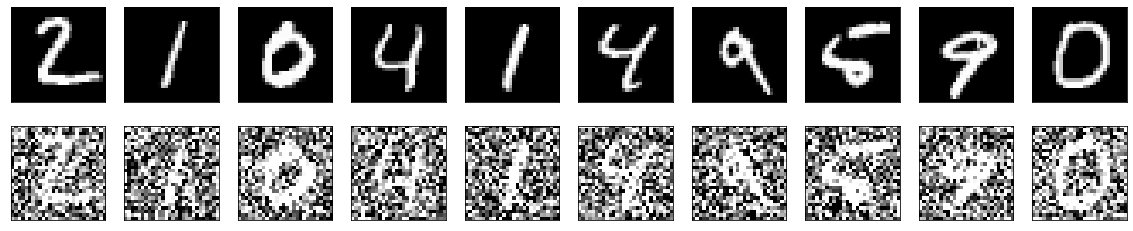

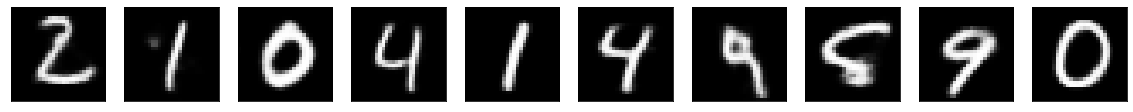

In [ ]:
n = 10
print("\nOrginal images: top row, Corrupted input: middle row,  Denoised input: third row\n")
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display noisy
    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Exe. 18 Implement an encoder decoder on Labeled Faces in the Wild dataset
http://vis-www.cs.umass.edu/lfw/.
